In [1]:
pip install pandas scikit-learn matplotlib                                                    

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # Corrected import statement
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('titanic_train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#Cheking first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Cheking last 5 rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis (EDA)

In [6]:
#Cheking columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
print("The shape of dataset is :",df.shape)

The shape of dataset is : (891, 12)


In [8]:
df = df.drop_duplicates()
print(f"Rows & Columns after deleting the duiplicates :",df.shape)

Rows & Columns after deleting the duiplicates : (891, 12)


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df=df.drop('PassengerId',axis=1)

In [14]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Number Data Type Columns are: 
 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer

# Imputing missing values in 'Age', 'Cabin', and 'Embarked' columns
imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Cabin', 'Embarked']] = imputer.fit_transform(df[['Age', 'Cabin', 'Embarked']])

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [20]:
df['Age'].value_counts()

Age
24.00    207
22.00     27
18.00     26
28.00     25
30.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [21]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']

Number Data Type Columns are: 
 ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']


In [25]:
df.describe(include="all").T  #Discribe function we get all type of values


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,88.0,24.0,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,891,147,B96 B98,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.nunique().to_frame("Unique Values")

,Unique Values
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [33]:
#Exploring unique values in each categorical coloumn
for col in categorical_cols:
    print(df[col].value_counts())
    print("="*50)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    207
22.00     27
18.00     26
28.00     25
30.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Cabin
B

Cheking no of rows covered by  all unique values  present in our object data type columns.
It look like all the column have proper categories but the column "TotalCharges" has float value still get tagged as a object data type plus 11 rows of that column are blank data we will fix this before we proceed with any further analysis.

In [34]:
# Exploring summary statistics for numerical columns because we have all numerical columns.
for col in numerical_cols:
    print(col)
    print("Mean:", df[col].mean())
    print("Standard Deviation:", df[col].std())
    print("Minimum:", df[col].min())
    print("25th Percentile:", df[col].quantile(0.25))
    print("Median:", df[col].median())
    print("75th Percentile:", df[col].quantile(0.75))
    print("Maximum:", df[col].max())
    print("="*50)


Survived
Mean: 0.3838383838383838
Standard Deviation: 0.4865924542648585
Minimum: 0
25th Percentile: 0.0
Median: 0.0
75th Percentile: 1.0
Maximum: 1
Pclass
Mean: 2.308641975308642
Standard Deviation: 0.8360712409770513
Minimum: 1
25th Percentile: 2.0
Median: 3.0
75th Percentile: 3.0
Maximum: 3
SibSp
Mean: 0.5230078563411896
Standard Deviation: 1.1027434322934275
Minimum: 0
25th Percentile: 0.0
Median: 0.0
75th Percentile: 1.0
Maximum: 8
Parch
Mean: 0.38159371492704824
Standard Deviation: 0.8060572211299559
Minimum: 0
25th Percentile: 0.0
Median: 0.0
75th Percentile: 0.0
Maximum: 6
Fare
Mean: 32.204207968574636
Standard Deviation: 49.693428597180905
Minimum: 0.0
25th Percentile: 7.9104
Median: 14.4542
75th Percentile: 31.0
Maximum: 512.3292


In [35]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']

Number Data Type Columns are: 
 ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']


In [36]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Visualization

Sex
male      577
female    314
Name: count, dtype: int64


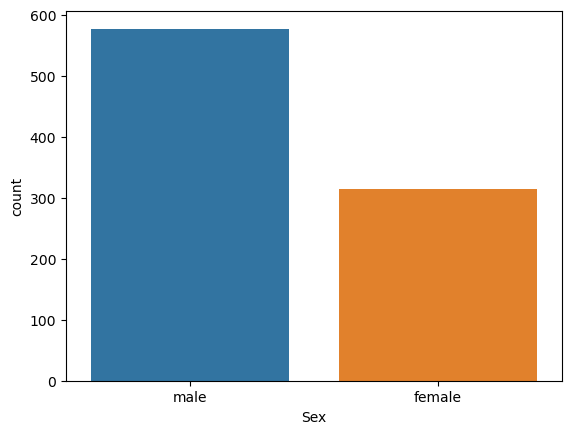

In [38]:
ax = sns.countplot (x='Sex',data=df[categorical_cols])
print(df['Sex'].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


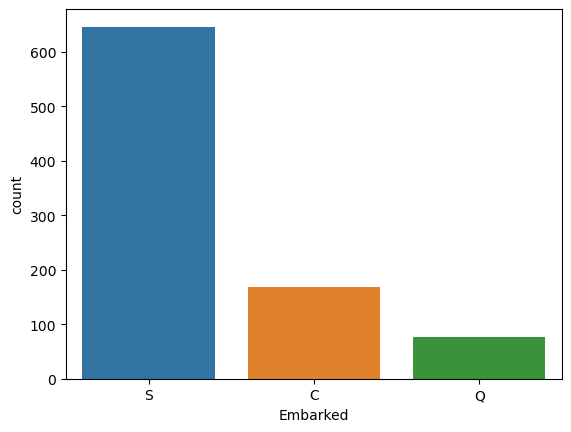

In [41]:
ax = sns.countplot (x='Embarked',data=df[categorical_cols])
print(df['Embarked'].value_counts())

Exploring Continuus Columns

0.4785234382949897


<Axes: xlabel='Survived', ylabel='Density'>

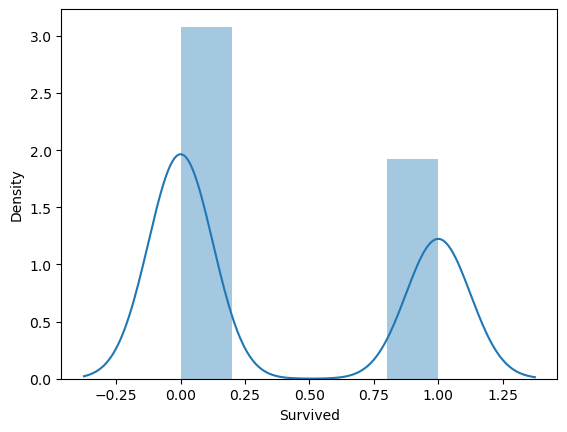

In [42]:
print(df['Survived'].skew())
sns.distplot(df['Survived'],kde=True)

-0.6305479068752845


<Axes: xlabel='Pclass', ylabel='Density'>

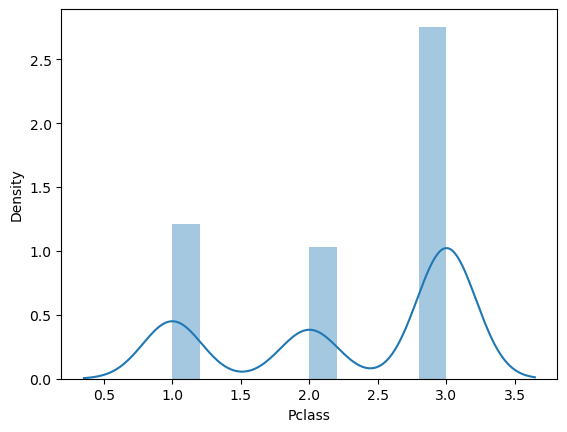

In [43]:
print(df['Pclass'].skew())
sns.distplot(df['Pclass'],kde=True)

3.6953517271630565


<Axes: xlabel='SibSp', ylabel='Density'>

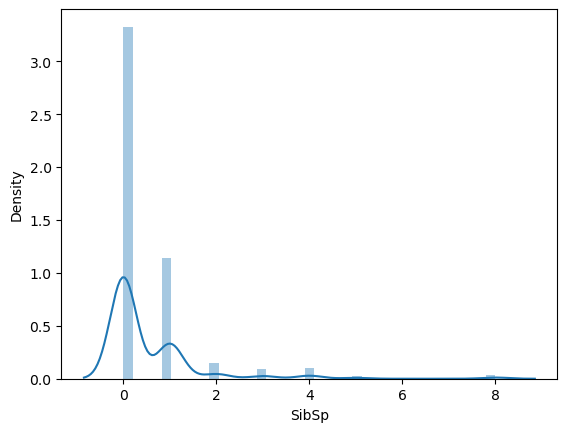

In [44]:
print(df['SibSp'].skew())
sns.distplot(df['SibSp'],kde=True)

2.7491170471010933


<Axes: xlabel='Parch', ylabel='Density'>

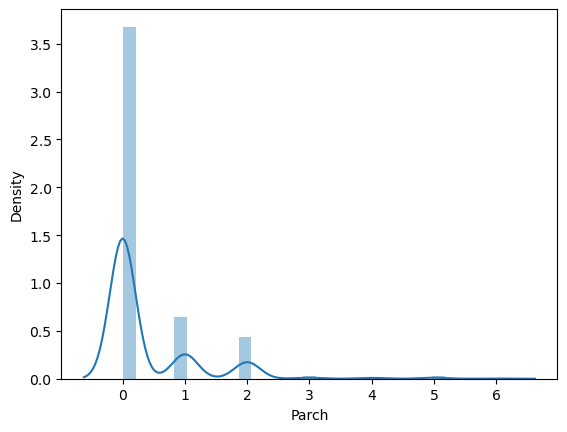

In [45]:
print(df['Parch'].skew())
sns.distplot(df['Parch'],kde=True)

4.787316519674893


<Axes: xlabel='Fare', ylabel='Density'>

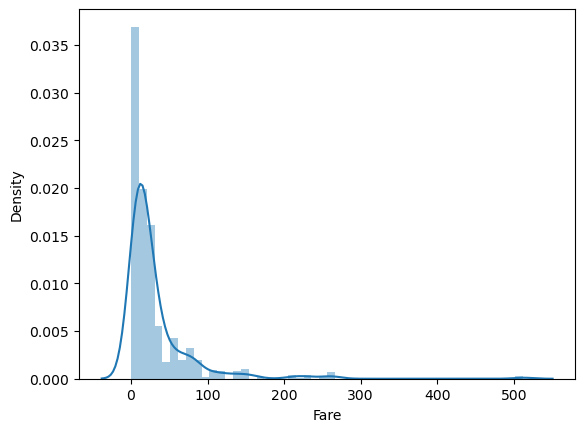

In [46]:
print(df['Fare'].skew())
sns.distplot(df['Fare'],kde=True)

Skewness found will fix this later in the project

<Axes: xlabel='Name', ylabel='Age'>

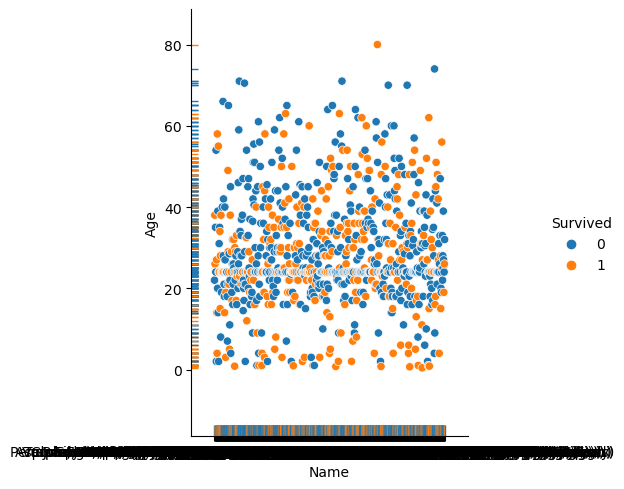

In [48]:
sns.relplot(data=df, x='Name', y='Age', hue='Survived')
sns.rugplot(data=df, x='Name', y='Age', hue='Survived', legend=False)

<Axes: xlabel='Fare', ylabel='Age'>

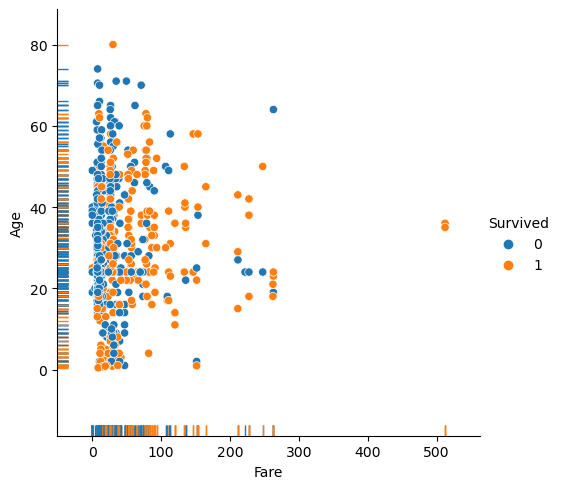

In [58]:
sns.relplot(data=df, x='Fare', y='Age', hue='Survived')
sns.rugplot(data=df, x='Fare', y='Age', hue='Survived', legend=False)

<Axes: xlabel='Cabin', ylabel='Age'>

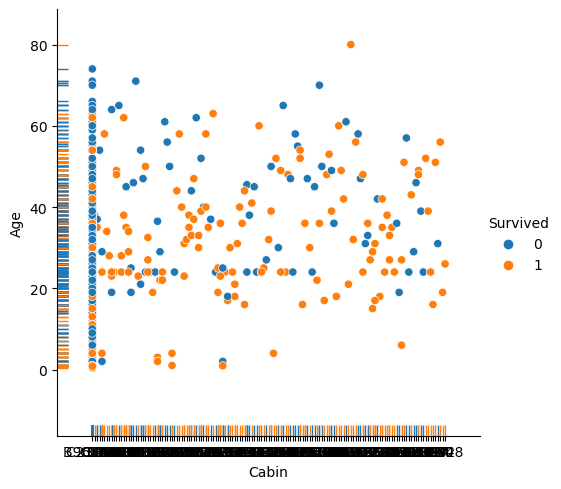

In [59]:
sns.relplot(data=df, x='Cabin', y='Age', hue='Survived')
sns.rugplot(data=df, x='Cabin', y='Age', hue='Survived', legend=False)

<Axes: xlabel='SibSp', ylabel='Age'>

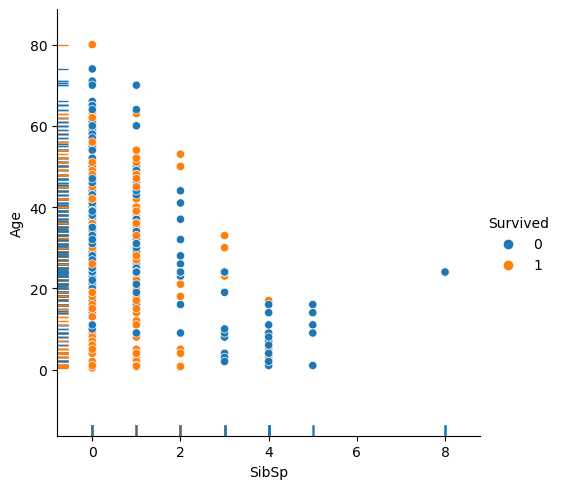

In [64]:
sns.relplot(data=df, x='SibSp', y='Age', hue='Survived')
sns.rugplot(data=df, x='SibSp', y='Age', hue='Survived', legend=False)

<Axes: xlabel='Ticket', ylabel='Age'>

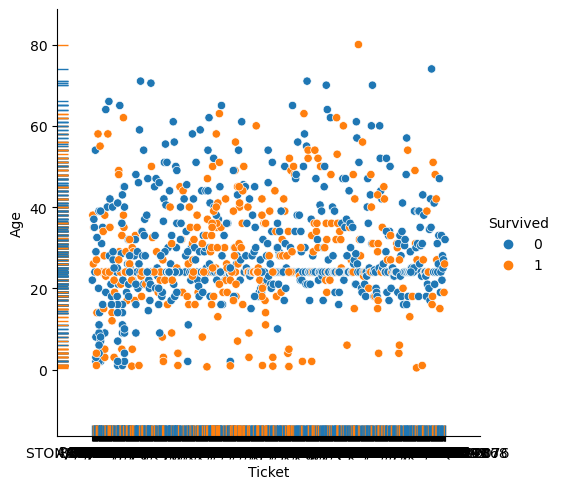

In [65]:
sns.relplot(data=df, x='Ticket', y='Age', hue='Survived')
sns.rugplot(data=df, x='Ticket', y='Age', hue='Survived', legend=False)

# Encoading the Categorical object datatype columns 

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [68]:
for i in  df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,28,1,0,523,7.2500,47,2
1,1,1,190,0,51,1,0,596,71.2833,81,0
2,1,3,353,0,34,0,0,669,7.9250,47,2
3,1,1,272,0,47,1,0,49,53.1000,55,2
4,0,3,15,1,47,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,35,0,0,101,13.0000,47,2
887,1,1,303,0,24,0,0,14,30.0000,30,2
888,0,3,413,0,31,1,2,675,23.4500,47,2
889,1,1,81,1,34,0,0,8,30.0000,60,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int32  
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    int32  
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int32  
 10  Embarked  891 non-null    int32  
dtypes: float64(1), int32(6), int64(4)
memory usage: 55.8 KB


Sucessfully Converted Object Datatype into int datatype
Cheking for non values after applying transformation technique

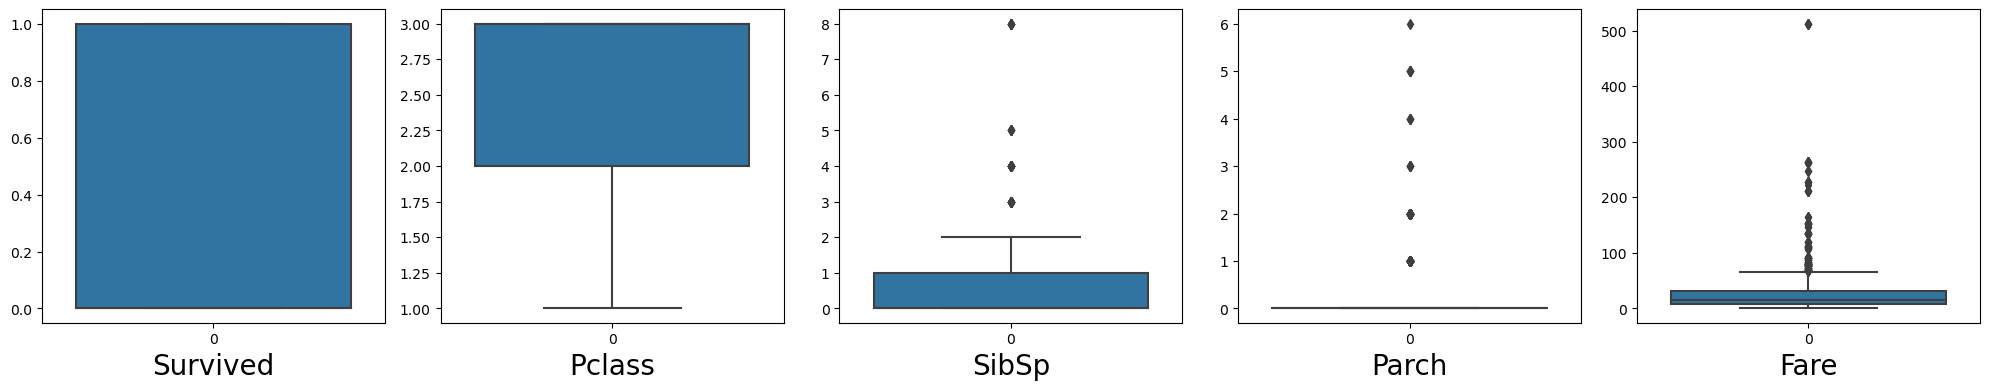

In [70]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number = 1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
    
plt.tight_layout()

With the usage of box plot we tried  to check for outliers in our continous data columns and we found no outliers in them  

In [71]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.595582
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

With the skew method we see that there are column present in our data set that are above the aceptable range of +/-0.5 value however most of those are Categorical columns and do not worry about outliers or skewness in catagorical data therefore we will ignore having said that the skewness that is present 
In our continous data columns in catagorical column we wont have to fix any other concern in our dataset. 

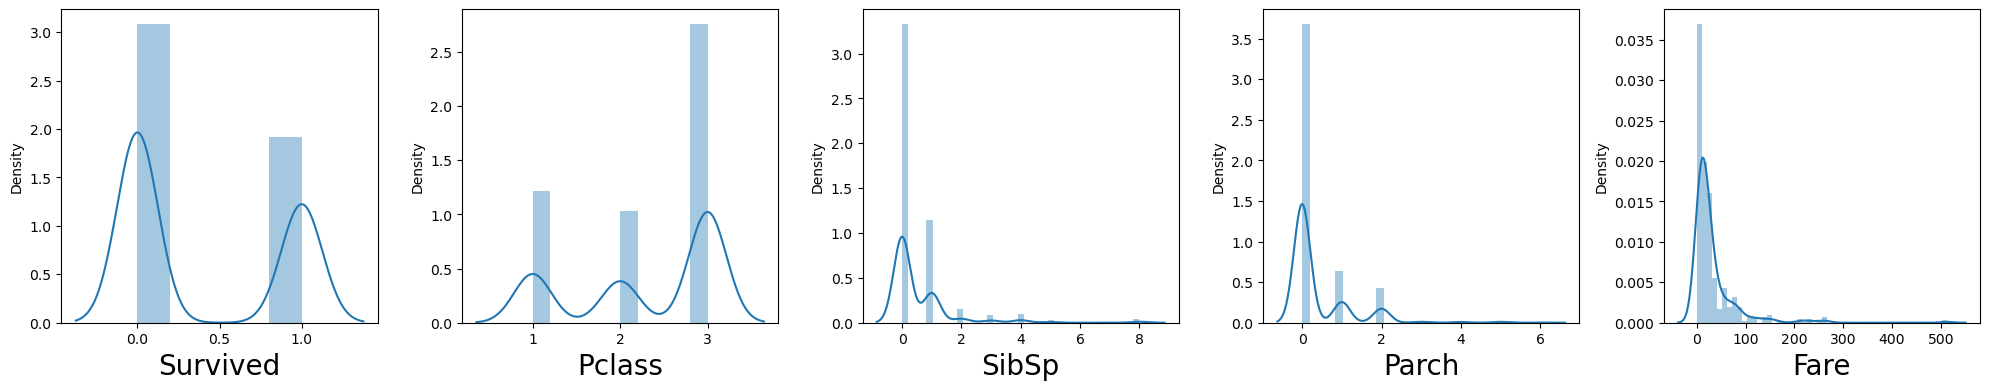

In [72]:
plt.figure(figsize=(20,15),facecolor='white')
plot_numbers=1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
plt.tight_layout()    
        

In the above distribution plot we can see that our continous data columns have some skewness that will need to be treated and reduced  to cover up an 
acceptable range in data values.

In [74]:
for col in numerical_cols:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [76]:
for col in numerical_cols:
    skewness = df[col].skew()
    if abs(skewness) > 0.55:  # Check if skewness exceeds threshold
        if skewness > 0:  # Positive skewness
            df[col] = np.log1p(df[col])
        else:   # Negative skewness
            df[col] = np.exp(df[col]) - 1

In [77]:
df[numerical_cols].skew()

Survived    0.478523
Pclass     -0.324090
SibSp       1.002587
Parch       1.354107
Fare        0.394928
dtype: float64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Name'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Ticket'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

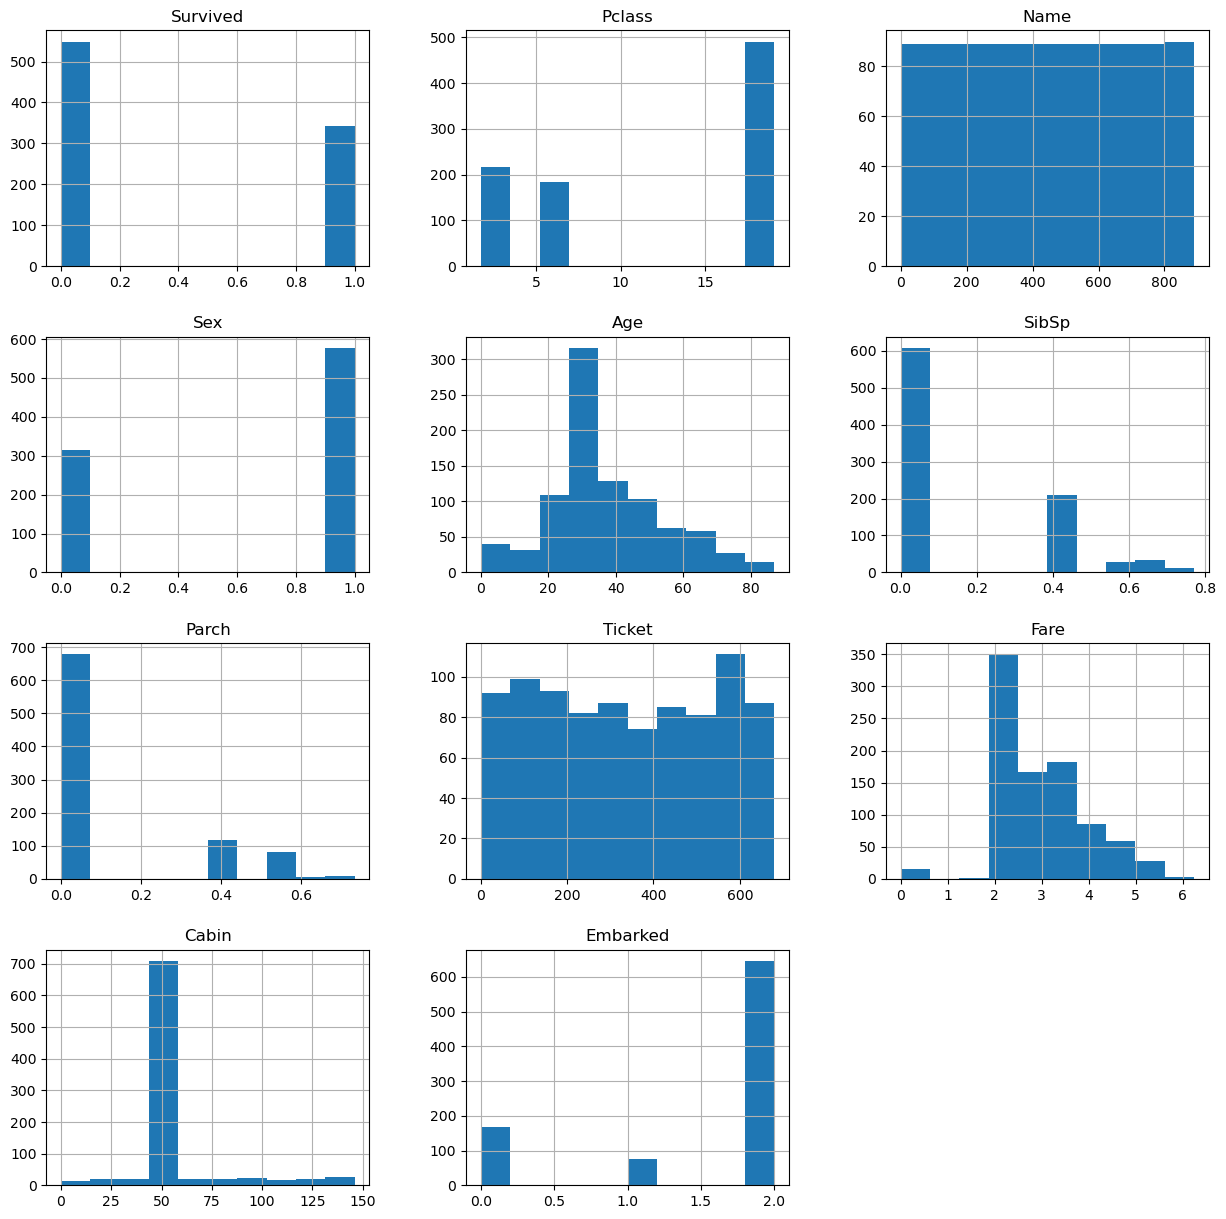

In [78]:
df.hist(figsize=(15,15))

I have generated a histogram for all our dataset columns after applying encoading technique & converting all object datatype columns to numeric datatype values 

In [79]:
df.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.337406,-0.057343,-0.543351,-0.046046,0.073601,0.132436,-0.164549,0.329862,0.175690,-0.167675
Pclass,-0.337406,1.000000,0.054873,0.137444,-0.348479,-0.025265,-0.019843,0.322541,-0.612247,-0.234002,0.116615
Name,-0.057343,0.054873,1.000000,0.020314,0.024632,-0.078888,-0.046924,0.047348,-0.057546,0.034129,-0.006117
Sex,-0.543351,0.137444,0.020314,1.000000,0.067918,-0.189147,-0.256102,0.059372,-0.263276,-0.102643,0.108262
Age,-0.046046,-0.348479,0.024632,0.067918,1.000000,-0.171702,-0.209863,-0.075753,0.139289,0.082131,0.004452
SibSp,0.073601,-0.025265,-0.078888,-0.189147,-0.171702,1.000000,0.463057,0.019838,0.393265,0.055958,0.012822
Parch,0.132436,-0.019843,-0.046924,-0.256102,-0.209863,0.463057,1.000000,0.003814,0.370655,0.060246,0.016120
Ticket,-0.164549,0.322541,0.047348,0.059372,-0.075753,0.019838,0.003814,1.000000,-0.110965,-0.072200,-0.001729
Fare,0.329862,-0.612247,-0.057546,-0.263276,0.139289,0.393265,0.370655,-0.110965,1.000000,0.191159,-0.202444
Cabin,0.175690,-0.234002,0.034129,-0.102643,0.082131,0.055958,0.060246,-0.072200,0.191159,1.000000,0.023804


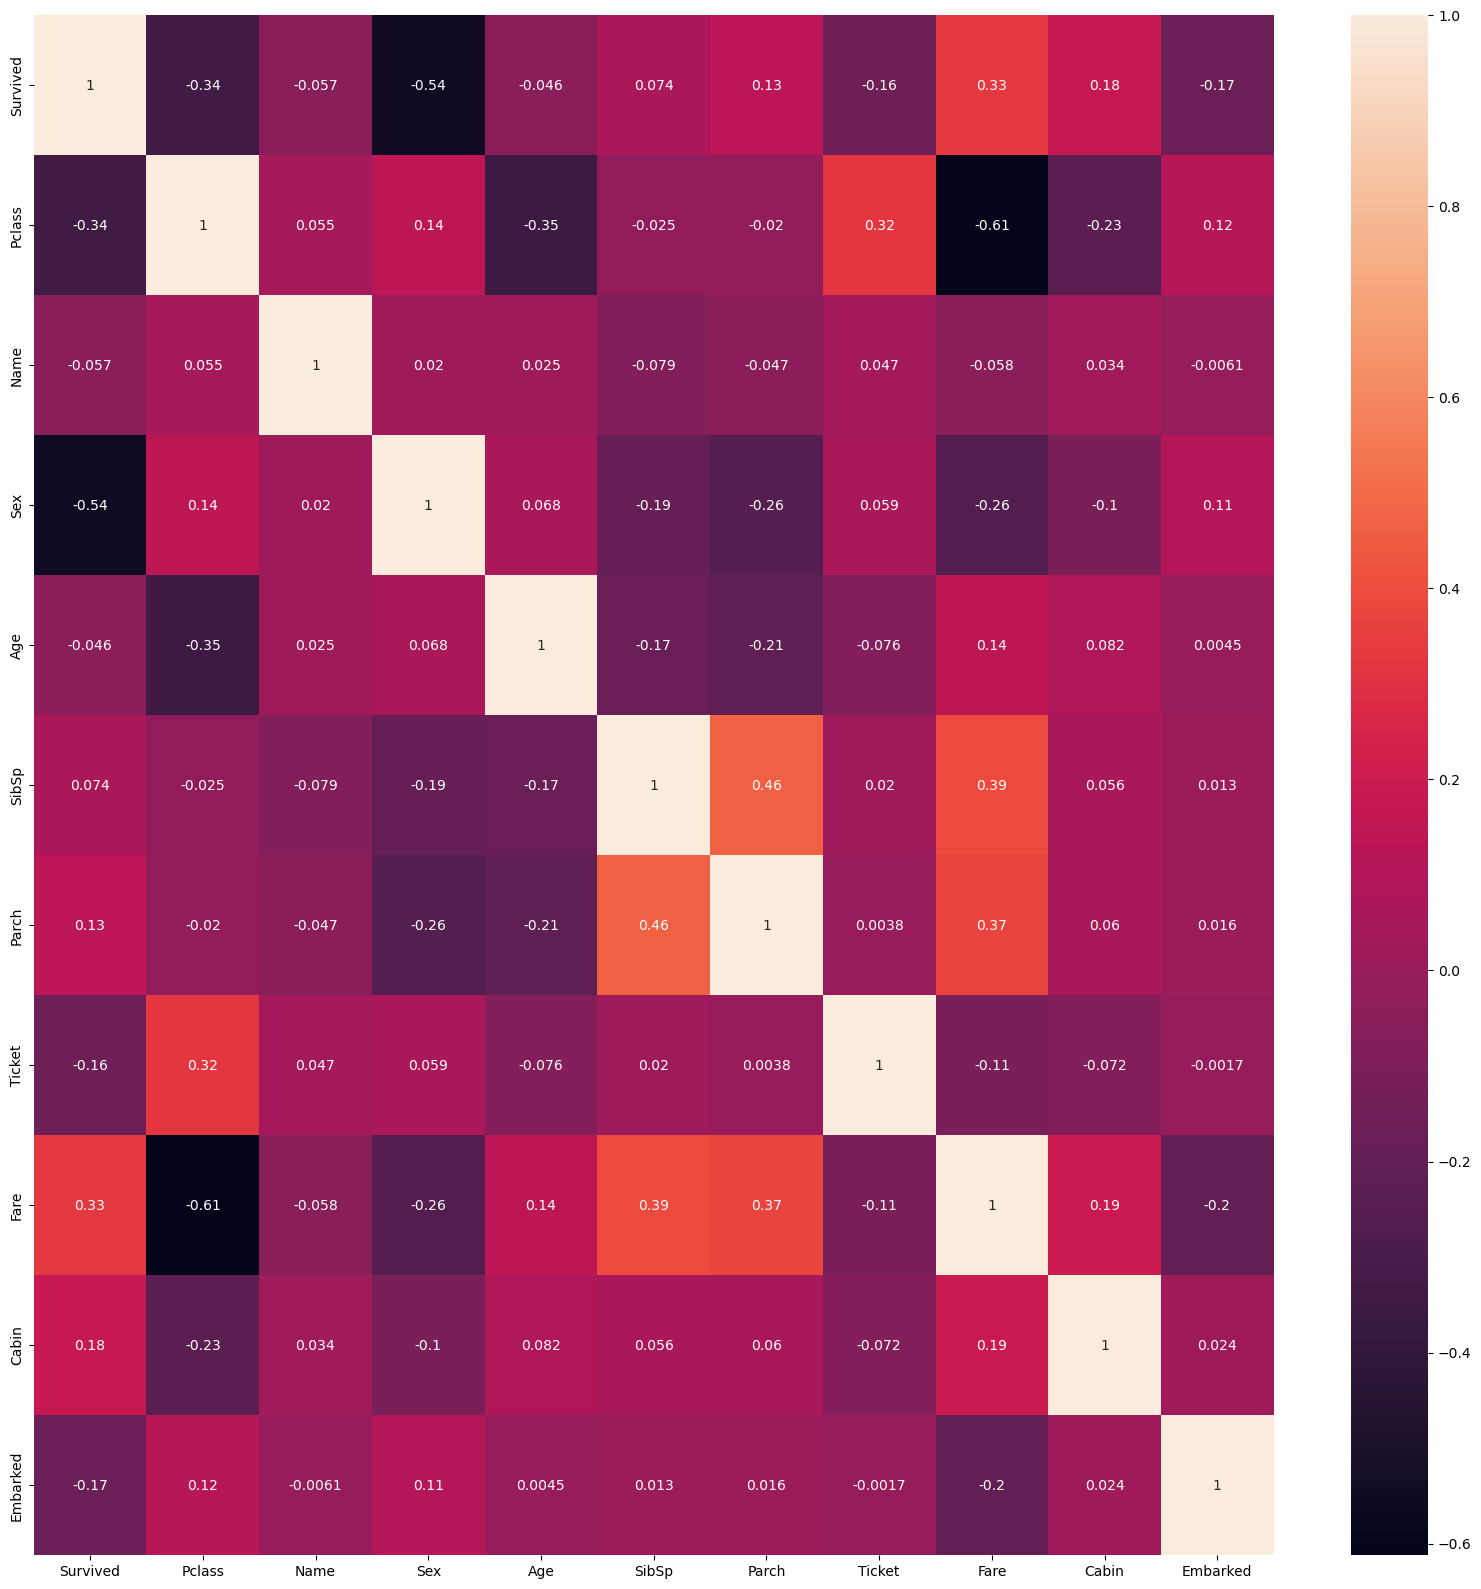

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Positive Correlation:- A correlation of +1 indicates a perfect positive correlation meaning that both variables move in the same direction together
Negative Correlation:- A Correlation of -1 indicates a perfect negative correlation meaning that as one variable goes up, the other goes down

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns. 

# Correlation Bar Plot Comparing features with our lable

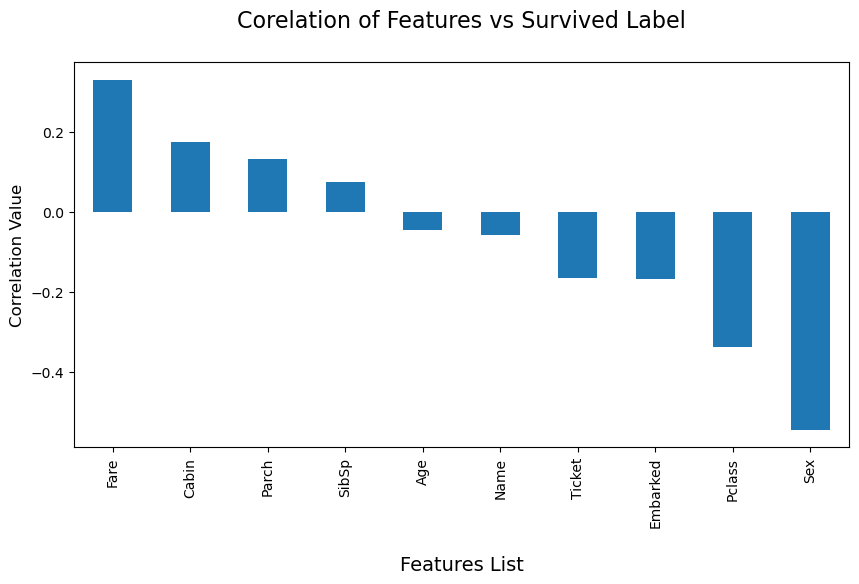

In [82]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Survived'].sort_values(ascending=False).drop('Survived').plot.bar()
plt.title("Corelation of Features vs Survived Label\n", fontsize=16)
plt.xlabel("\nFeatures List",fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture on positive & negative correlation columns we have generated this bar plot & we see that Fare, Cabin, Parch, SibSp are positively correlated our target label Survived while all the remaining features are negativelly correlated with our label column.


Splitting the data set into 2 vaiables namely x & y for feture & label 

In [83]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,19.085537,108,1,28,0.423036,0.000000,523,2.110213,47,2
1,1,1.718282,190,0,51,0.423036,0.000000,596,4.280593,81,0
2,1,19.085537,353,0,34,0.000000,0.000000,669,2.188856,47,2
3,1,1.718282,272,0,47,0.423036,0.000000,49,3.990834,55,2
4,0,19.085537,15,1,47,0.000000,0.000000,472,2.202765,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,6.389056,548,1,35,0.000000,0.000000,101,2.639057,47,2
887,1,1.718282,303,0,24,0.000000,0.000000,14,3.433987,30,2
888,0,19.085537,413,0,31,0.423036,0.554618,675,3.196630,47,2
889,1,1.718282,81,1,34,0.000000,0.000000,8,3.433987,60,0


In [84]:
x = df.drop('Survived',axis=1)


In [85]:
y = df['Survived']

In [ ]:
# Resolving the class imbalance issue  in our label column

In [86]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
sm = SMOTE()

In [89]:
x,y = sm.fit_resample(x,y)

In [90]:
y.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

After applying Over sampling we are once again listing the values of our label column to cross verify the updeted information Hence we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the ML model does not get biased towards one category

# Scaling & Feature

In [91]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.93991454, -1.30010294,  0.92282286, ..., -0.94281578,
        -0.30372513,  0.66992045],
       [-1.30838203, -0.98125768, -1.08363159, ...,  1.29212336,
         1.11007369, -1.74179317],
       [ 0.93991454, -0.3474555 , -1.08363159, ..., -0.86183337,
        -0.30372513,  0.66992045],
       ...,
       [ 0.00611327,  0.51964809, -1.08363159, ..., -0.53031997,
         3.18918961,  0.66992045],
       [-1.01773882,  1.14567355, -1.08363159, ...,  0.01189352,
        -0.22056049, -0.53593636],
       [-1.30838203, -1.3039913 , -1.08363159, ...,  0.63544464,
        -1.05220686, -1.74179317]])

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, GridSearchCV


Finding best Random State for building our Classification Models

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()

maxAcc = 0
best_rs = 0

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    ac = accuracy_score(y_test, pred)
    
    if ac > maxAcc:
        maxAcc = ac
        best_rs = i

print('Best accuracy score:', maxAcc)
print('Random State:', best_rs)


Best accuracy score: 0.8872727272727273
Random State: 960


In [94]:
# Let us split the data now at that random state
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=60)


In [95]:
# Print the size of x_train
print("Size of x_train:", x_train.shape)

# Print the size of x_test
print("Size of x_test:", x_test.shape)

# Print the size of y_train
print("Size of y_train:", y_train.shape)

# Print the size of y_test
print("Size of y_test:", y_test.shape)

Size of x_train: (823, 10)
Size of x_test: (275, 10)
Size of y_train: (823,)
Size of y_test: (275,)


# Machine Lerning Model for Classification with Evaluation Metrice

In [96]:
def classify(clf, x, y):
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=868)

    # Training the model
    clf.fit(x_train, y_train)

    # Predicting Y test
    pred = clf.predict(x_test)

    # Accuracy Score
    acc_score = accuracy_score(y_test, pred)
    print("Accuracy Score:", acc_score)

    # Confusion Matrix
    print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)

    # Cross Validation Score
    cv_scores = cross_val_score(clf, x, y, cv=5)
    cv_mean = cv_scores.mean()
    print("Cross Validation Score:", cv_mean)

    # Result of accuracy minus CV scores
    result = acc_score - cv_mean
    print("\nAccuracy Score minus Cross Validation Score is", result)

In [ ]:
# Logestic Regression

In [97]:
clf = LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.8254545454545454
Confusion Matrix:
 [[118  18]
 [ 30 109]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       136
           1       0.86      0.78      0.82       139

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275

Cross Validation Score: 0.8143295973432959

Accuracy Score minus Cross Validation Score is 0.011124948111249533


In [ ]:
# Dession TreeClassification

In [98]:
clf = DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.8290909090909091
Confusion Matrix:
 [[113  23]
 [ 24 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       136
           1       0.83      0.83      0.83       139

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275

Cross Validation Score: 0.8261436280614364

Accuracy Score minus Cross Validation Score is 0.002947281029472726


In [ ]:
# Random Forest Classifier

In [99]:
clf = RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.8618181818181818
Confusion Matrix:
 [[122  14]
 [ 24 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       136
           1       0.89      0.83      0.86       139

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.86      0.86      0.86       275

Cross Validation Score: 0.8662391033623911

Accuracy Score minus Cross Validation Score is -0.004420921544209255


In [ ]:
# SVC

In [100]:
clf = SVC()
classify(clf,x,y)

Accuracy Score: 0.850909090909091
Confusion Matrix:
 [[122  14]
 [ 27 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       136
           1       0.89      0.81      0.85       139

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275

Cross Validation Score: 0.8425570776255707

Accuracy Score minus Cross Validation Score is 0.008352013283520199


In [ ]:
# KNeighborsClassifier

In [101]:
clf = KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.8327272727272728
Confusion Matrix:
 [[113  23]
 [ 23 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       136
           1       0.83      0.83      0.83       139

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275

Cross Validation Score: 0.8288833540888335

Accuracy Score minus Cross Validation Score is 0.0038439186384392476


In [ ]:
# XGB

In [102]:
!pip install xgboost


In [103]:
import xgboost as xgb

clf = xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.8690909090909091
Confusion Matrix:
 [[124  12]
 [ 24 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       136
           1       0.91      0.83      0.86       139

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275

Cross Validation Score: 0.8471274387712743

Accuracy Score minus Cross Validation Score is 0.02196347031963486


In [ ]:
# GradientBoostingClassifier

In [104]:
clf = GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.84
Confusion Matrix:
 [[119  17]
 [ 27 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.84       136
           1       0.87      0.81      0.84       139

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275

Cross Validation Score: 0.8425529265255293

Accuracy Score minus Cross Validation Score is -0.0025529265255292977


# Frome the above Evaluation Metrics, we can  clearly see that DecisionTreeClassifier is gioving best f1 score and least difference between accuracy score  & CV score so  selecting DecisionTreeClassifier ad a our final model 

In [109]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Confussion Matrix: ",confusion_matrix(y_test,pred))
print("Classification Report: \n",classification_report(y_test,pred))

Accuracy Score:  0.8181818181818182
Confussion Matrix:  [[102  23]
 [ 27 123]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       125
           1       0.84      0.82      0.83       150

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



In [ ]:
# Hyper Parameter tuning on DecisionTreeClassifier

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


par = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}
# Creating a GridSearchCV object
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=par, verbose=2, n_jobs=1)

# Fitting the grid to the training data
grid.fit(x_train, y_train)


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_lea

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)},
             verbose=2)

In [112]:
print("Best Score:", grid.best_score_)
print("Best Estimator:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_)


Best Score: 0.8347154471544715
Best Estimator: DecisionTreeClassifier(max_depth=7, min_samples_leaf=3)
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Decision Tree Classifier
dt_final = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3, min_samples_split=10, random_state=487)

# Fit the classifier to the training data
dt_final.fit(x_train, y_train)

# Make predictions on the test data
pred_dt = dt_final.predict(x_test)

print('Accuracy:', accuracy_score(y_test, pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_dt))
print('Classification Report:\n', classification_report(y_test, pred_dt))


Accuracy: 0.8109090909090909
Confusion Matrix:
 [[100  25]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       125
           1       0.83      0.82      0.83       150

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



After twining parameters we are going the best accuracy score 0.81 which is less than the accuracy score by DecisionTreeClassifier()
without hyper parameter tunning so lets model in by defoult DecisionTreeClassifierModel


In [ ]:
# AUC ROC Cureve

In [116]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics


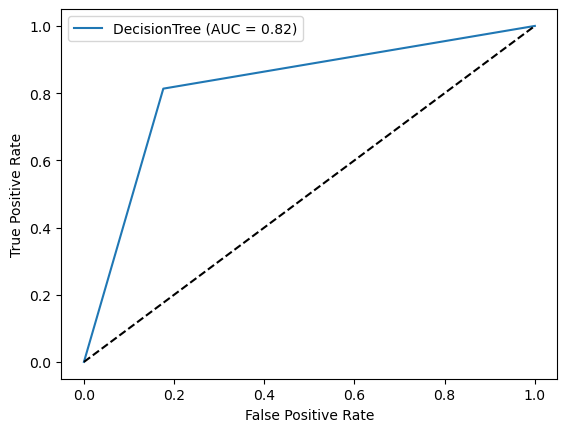

Overall AUC Score: 0.8186666666666669


In [122]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Binarize the labels for each class
y_test_binarized = label_binarize(y_test, classes=[0, 1])

# Predict the classes for the test data
y_pred = dt.predict(x_test)

# Compute ROC-AUC score
auc_score = roc_auc_score(y_test_binarized, y_pred)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'DecisionTree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overall AUC score
print('Overall AUC Score:', auc_score)


In [ ]:
# Confusion Matrix

In [125]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


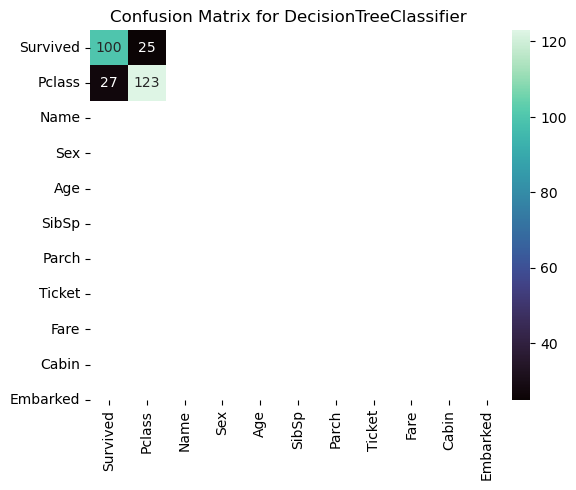

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = df.columns  

conf_matrix = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='mako', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()


With the help of above confusion matrix I'm able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction
(depicting in the blank boxes)

In [ ]:
# Saving the Model

In [132]:
import pickle

In [130]:
filename='Titanic survived Project Solution.pkl'

In [134]:
pickle.dump(dt,open(filename,'wb'))

In [135]:
#Conclusion
load_model=pickle.load(open('Titanic survived Project Solution.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

81.81818181818183
